# An example
You have just purchased a new car for $22,000. thee cost of maintaining a car during a year depends on its age at the
beginning of the year:

In [2]:
age_of_maintenance = [0,1,2,3,4]
maintenance_cost = [2000, 3000, 4000, 8000, 12000]

To avoid the high maintenance costs associated with an older car, you may trade in your car and purchase a new car.
thee price you receive on a trade-in depends on the age of the car at the time of the trade-in:

In [3]:
age_of_trade = [1,2,3,4,5]
trade_price = [15000, 12000, 9000, 5000, 2000]

For now, assume that at any time, it costs $22,000 to purchase a new car. Your goal is to minimize the net cost
(purchasing costs + maintenance costs − money received in trade-ins) incurred over the next five years.

1. Formulate your problem as a shortest path problem.
2. Solve your shortest path formulation: give the shortest path length and a shortest path.
3. Interpret the shortest path length and shortest path in the context of the problem.

- Recall that we formulated this problem as a shortest path problem back in Lesson 1, like this:
- Let’s solve this shortest path problem — that is,
- obtain the length of a shortest path
- obtain the nodes/edges in a shortest path
- First obstacle: how do we represent graphs in Python?

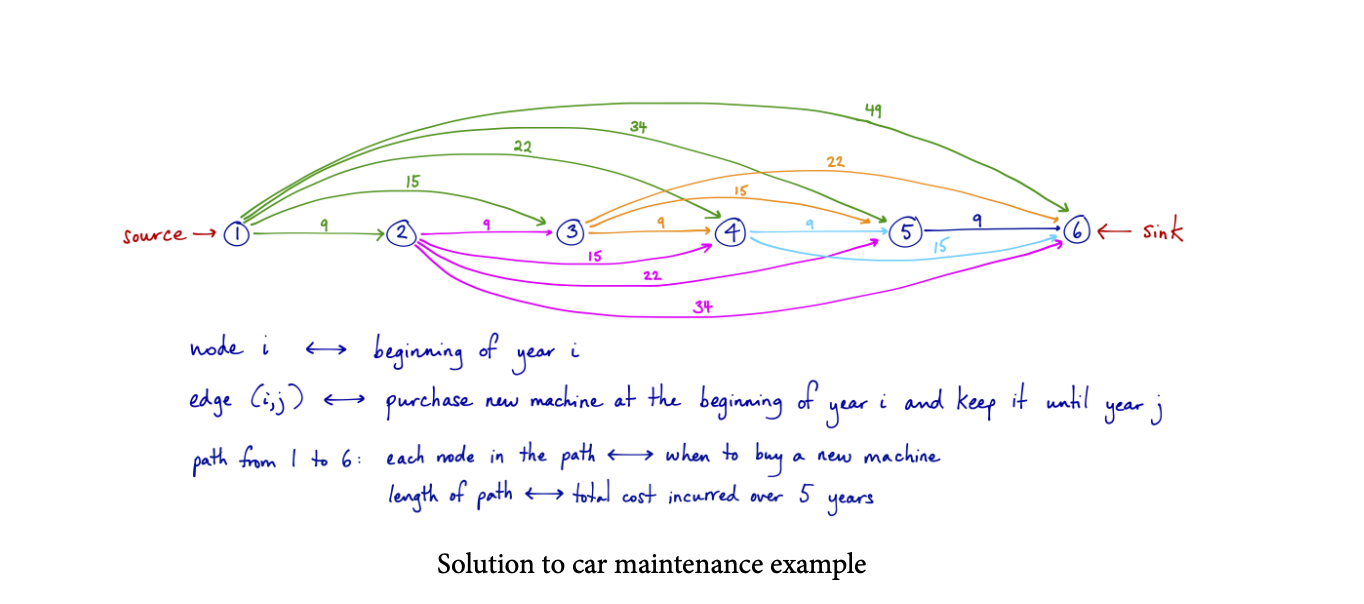

In [4]:
from IPython.display import Image
Image(filename='./minimize_cost_of_maintance_graph.png') 

In [63]:
import networkx as nx
import netgraph
import numpy as np
import matplotlib.pyplot as plt
import bellmanford as bf
from networkx.classes.function import path_weight

In [6]:
# Create empty digraph
G = nx.DiGraph()

In [7]:
# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)

In [8]:
# Add edge (1,2) with length 9
G.add_edge(1, 2, length=9)

In [9]:
# Add the rest of the edges outgoing from node 1
G.add_edge(1, 3, length=15)
G.add_edge(1, 4, length=22)
G.add_edge(1, 5, length=34)
G.add_edge(1, 6, length=49)
# Add edges outgoing from node 2
G.add_edge(2, 3, length=9)
G.add_edge(2, 4, length=15)
G.add_edge(2, 5, length=22)
G.add_edge(2, 6, length=34)
# Add edges outgoing from node 3
G.add_edge(3, 4, length=9)
G.add_edge(3, 5, length=15)
G.add_edge(3, 6, length=22)
# Add edges outgoing from node 4
G.add_edge(4, 5, length=9)
G.add_edge(4, 6, length=15)
# Add edges outgoing from node 5
G.add_edge(5, 6, length=9)

In [69]:
# Bellman Ford
path_length, path_nodes, negative_cycle = bf.bellman_ford(G, source=1, target=6, weight="length")
print("Is there a negative cycle? {0}".format(negative_cycle))
print("Shortest path length: {0}".format(path_length))
print("Shortest path: {0}".format(path_nodes))

Is there a negative cycle? False
Shortest path length: 37
Shortest path: [1, 3, 6]


In [70]:
# Shortest dijkstra
shortest_path = [p for p in nx.all_shortest_paths(G, source=1, target=6, weight="length", method='dijkstra')]
print(shortest_path)
for i in shortest_path:
    print(path_weight(G, i, weight="length"))

[[1, 3, 6], [1, 4, 6]]
37
37
